## 1. 사진 준비
- 이미지 처리를 위해 opencv 와 노트북에 이미지를 출력하기 위한 matplotlib를 읽어옵니다.

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("🌫🛸")

🌫🛸


Step1: OpenCV로 이미지를 불러왔습니다. 휴대폰에 보관하고 있던 셀카를 Selfie라는 제목으로 업로드한 것입니다.

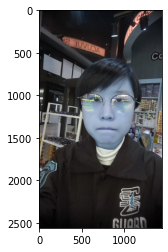

In [44]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/Selfie.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러오기
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관
plt.imshow(img_bgr)
plt.show()

Step2: RGB이미지로 바꿔주는 작업을 합니다

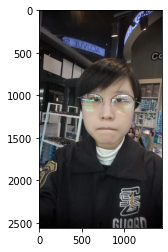

In [45]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## 2. 얼굴 추출

Step3: hog detector를 선언하고

In [46]:
detector_hog = dlib.get_frontal_face_detector()
print("🌫🛸")

🌫🛸


Step4: 얼굴의 bounding box를 추출합니다.
    이때, detector_hog의 두번째 파라미터인 '1'은 upsampling방법으로 크기를 키운 이미지 피라미드의 수 입니다.

In [47]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


Step5: 화면에 bounding box로 찾은 얼굴을 추출합니다.

rectangles[[(502, 872) (1167, 1538)]]


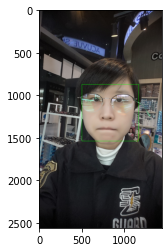

In [48]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

Step6: 저장된 Dlib의 landmark모델을 불러옵니다.

In [49]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [ ]:
Step7: 얼굴 영역 박스마다 face landmakr를 찾아내고, 좌표를 저장해 둡니다

In [50]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
 
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


In [ ]:
Step8: landmark를 사진에 출력해봅니다 (그리고 어째서인지 나타나지 않았다...)

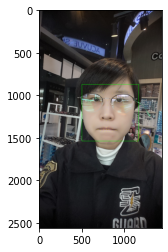

In [51]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 3. 스티커 추가

In [ ]:
Step9: 코의 중심점과 스티커의 위치, 스티커의 크기를 계산합니다.

In [81]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
    y = landmark[30][1] + dlib_rect.height()//2   # 코의 좌표를 기준으로 스티커의 y좌표 위치를 계산했습니다
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(790, 1230)
(x,y) : (790,1563)
(w,h) : (666,666)


- (고양이 수염)스티커 이미지를 불러오고

In [82]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) 
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(666, 666, 3)


- x, y 좌표를 조정합니다

In [83]:
refined_x = x - w // 2
refined_y = y - h 
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (457,897)


In [84]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


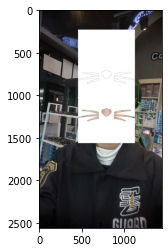

In [85]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

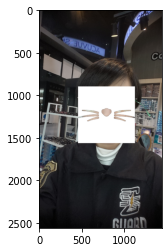

In [86]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 반성점:
얼굴의 landmark 표시가 나타나지 않는 것을 해결하지 못하였다.
(사진의 크기가 예시 노드의 사진보다 크기도 용량도 커서 landmark의 원형 점들이 가시화 되지 않은걸까?)
png파일의 사진을 다운받았으나 사진의 상태가 제대로 된것 같지 않다. 결국 원하던 이미지를 구하지 못하게 되었다..